## Machine Learning and Artificial Intelligence

Machine learning is a part of Artificial Intelligence. Some of its aspect include predicting, learning, deciding, remembering (past data), analyzing, and reorganizing data. This is what happen behind the stage, it is important to remember when we use the term artificial intelligence too much.

In fact, machine learning and deep learning are the ground for artificial intelligence. Both use the past data to make prediction about future data. Machine learning particularly is an application of Artificial Intelligence where in the system gets the ability to automatically learn and improve based on its experience. 

## Machine Learning types

There are three types of Machine Learning which is:
1) Supervised Learning\
We have past data (feature columns) and its answer (target column)

2) Unsupervised Learning\
We have past data (feature columns) but we don't have its answer (target column)

3) Reinforcement Learning\
We do not have past data but use the data one line at the time

## Problems in Machine Learning

(1) Classification\
Problem with categorical solutions, like "yes" or "no", "true" or "false"

For simpler data, we can use Naive-Bayes Classifier or Logistic Regression.\
FOr complex data, we can use Decision Tree or Random Forest.

(2) Regression \
Continuous value needs to be predicted like "product price" and "profit"

(3) Clustering\
Problem wherein the data need to be organized to find the specific patterns like the case of "product recommendation"


 ## Machine Learning - Decision Tree
 
 We are are going to look into the problem of classification in Machine Learning using decision tree.
 
 < Overview >
 
 Decision tree is tree shaped diagram used to determine a course of action. Each branch of tree represent a possible decision, or occurance of reaction. In essence, decision tree determine a set of logic if-then conditions to classify problems by certain feature.
 
 < Advantage of Decison Tree >
 
 1. Simple to understand, interpret and visualize
 2. Little data preparation
 3. Can be used both on numerical and categorical data
 4. Non-linear regression does not affect performance
 
 < Disadvantage of Decision Tree > 
 1. Overfittiing: Algorithm capture the noise in the data
 2. High Variance: Model can get unstable due to small variation in data
 3. Low biased tree: Complicated data make it difficult for model to work with new data
 
 < Important terms in decision tree >
 
 1. Entropy: Measure of randomness/unpredictibility in dataset
 
 In Machine Learning, entropy is quantitative measure of the randomness of the information being processed.
 
 High Entropy Value: randomness in the system is high, making accurate prediction tough\
 Low Entropy Value: randomness in the system is low, making accurate prediction is easier
 
 
 2. Information gain: Measure of decrease in entropy after dataset is split
 
 In Machine Learning, information gain is the measure of how much information a feature provided about a class. Low entropy leads to increase information gain. High entropy leads to low information gain. Information gain is computed by the difference between entropy before split and average entropy after split of the dataset based on given feature.

 3. Gini Impurity

Gain impurity is the measure of how much impurity in the data(node).\
The split made in decision tree is said to be "pure" if all the data are accurately separated into different classes. Gini impurity measures the likelihood that a randomly selected data points would be incorrectly classified by a specific node.


 4. Leaf node: The decision node
 
 5. Root node: Top most decision node

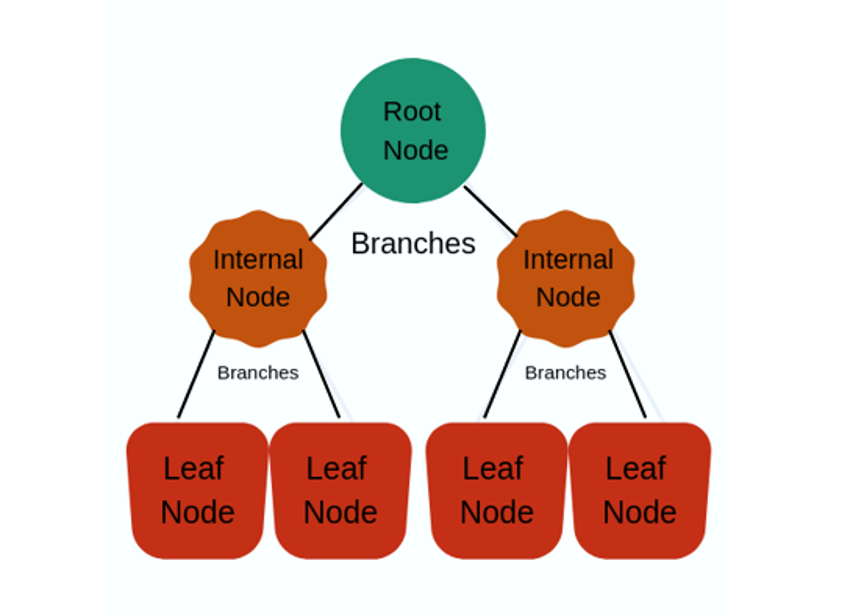

< How decision tree work >

We want to classify different types of items/people/targets based on their features using decision tree. So we have to frame the conditions that split the data in such a way that the information gain is highest. Remember than information gain is the measure of decrease in entropy after splitting. The steps are as below:

1. We will calculate the entropy of the dataset similarly after every split to calculate the gain.
2. Gain can be calculated by finding the difference of the subsequent entropy values after split
3. Then we have to choose the conditions that give the highest gain
4. Split the data using each conditions and check the gain that we get out of them
5. The condition that give us the highest gain is used to make the first split. Next highest gain is used to make the second split and so on.


< How to calculate entropy and gini impurity value >

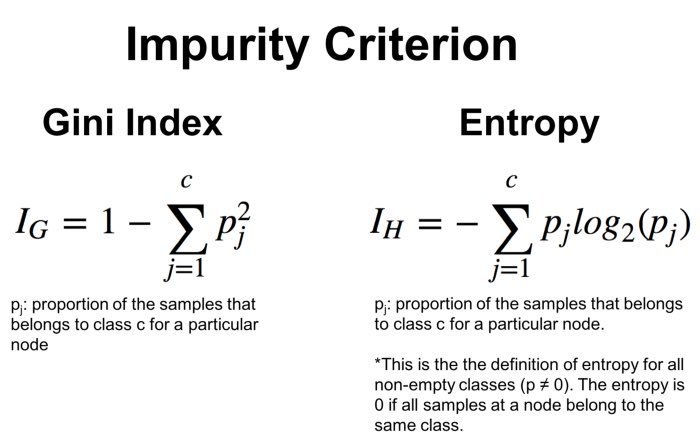

# Decision Tree [Project 3 : Loan approval prediction]

#### Problem Statement
Loan Approval prediction 

Problem Statement:\
As a data analyst working with banking sector, we are required to analyze some samples of applicants and their loan approval status. The features of the applicants are annual income, loan amount, loan term and credit score. 
 
Algorithm:\
Predict the loan approval of applicants using decision tree algorithm in python.

#### Import packages

In [13]:
# import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # split data: train data and test data
from sklearn.tree import DecisionTreeClassifier # the decision tree algorithm
from sklearn.metrics import accuracy_score # accuracy score metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix

%matplotlib inline

#### Load dataset

In [2]:
# load dataset
# use df.dropna() ti remove any missing value when needed

df = pd.read_csv('loan_approval_dataset.csv')
df.rename(columns={'cibil_score': 'credit_score'}, inplace = True)

# load target column to the data table
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# see the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   credit_score              4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### Clean dataset

In [4]:
# count NA value

df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
credit_score                0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [5]:
# drop NA

df = df.dropna()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# change categorical to numerical data

df['education'].replace([' Not Graduate', ' Graduate'], [0, 1], inplace=True)
df['self_employed'].replace([' No', ' Yes'], [0, 1], inplace=True)
df['loan_status'].replace([' Rejected', ' Approved'], [0, 1], inplace=True)

In [7]:
# dataset overview

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


#### Descriptive statistics

In [8]:
# descriptive statistic of dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
education,4269.0,5.022253e-01,5.000536e-01,0.0,0.0,1.0,1.0,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,1.0,1.0,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
credit_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0


In [9]:
# dataset length and shape
print("Dataset Length: ", len(df))
print("Dataset Shape: ", df.shape)

Dataset Length:  4269
Dataset Shape:  (4269, 13)


1    2656
0    1613
Name: loan_status, dtype: int64


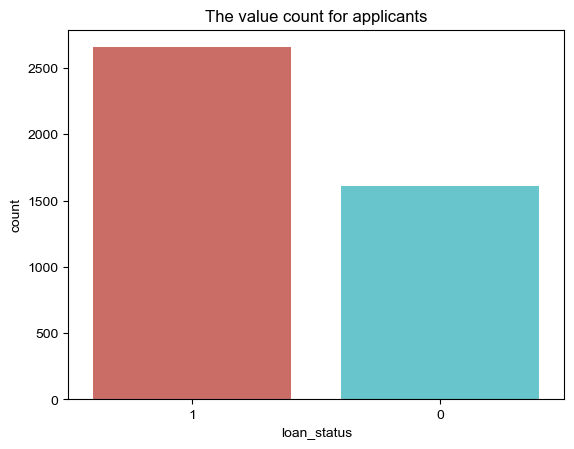

In [11]:
# the value count for applicants (1 for approved, 0 for rejected)
print(df['loan_status'].value_counts())
      
plt.rcParams.update(plt.rcParamsDefault)

sns.countplot(x='loan_status',data = df, palette='hls',order = df['loan_status'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('The value count for applicants')
plt.show()

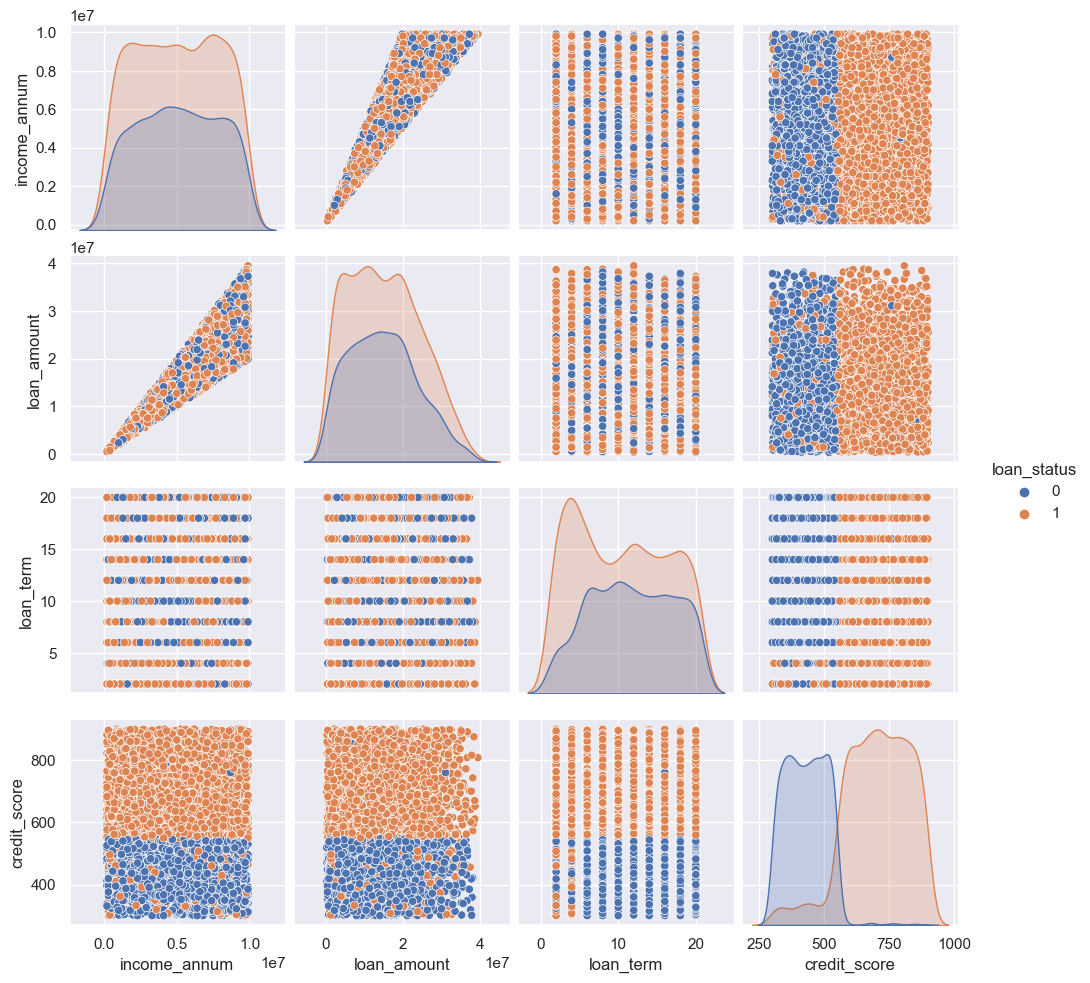

In [15]:
# seaborn pairplot, hue = dependent variable
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.

df1 = df[['income_annum','loan_amount','loan_term','credit_score','loan_status']]
sns.pairplot(df1, hue = 'loan_status')

#### Split data into train and test dataset

In [16]:
# separate the target variable
X = df[['income_annum','loan_amount','loan_term','credit_score']]
Y = df['loan_status']

# split the data set into Test and Train
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state = 100, test_size = 0.3)

#### Decision Tree using scikit-learn

In [17]:
# Function to perform training with Entropy
# criterion = 'entropy: criteria we choose to construct decision tree
# random_state: to make the same random state everytime we run the code
# max_depth: decision tree will go down 3 layers deep before it stops
# min_sample_leaf: we gonna have at least 5 leaf at the end 

clf_entropy = DecisionTreeClassifier( criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

#### Model accuracy and confusion matrix

In [39]:
# Predict using test set data
y_pred = clf_entropy.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [40]:
# show the true value of target variable
y_test.value_counts()

1    816
0    465
Name: loan_status, dtype: int64

In [41]:
# Evaluate the model: accuracy_model
# how many we get right vs how many we get wrong

accuracy_score(y_test,y_pred)
print("Accuracy of model: ", round(accuracy_score(y_test,y_pred)*100,2))

Accuracy of model:  96.25


Text(0.5, 1.0, 'Accuracy Score: 0.963')

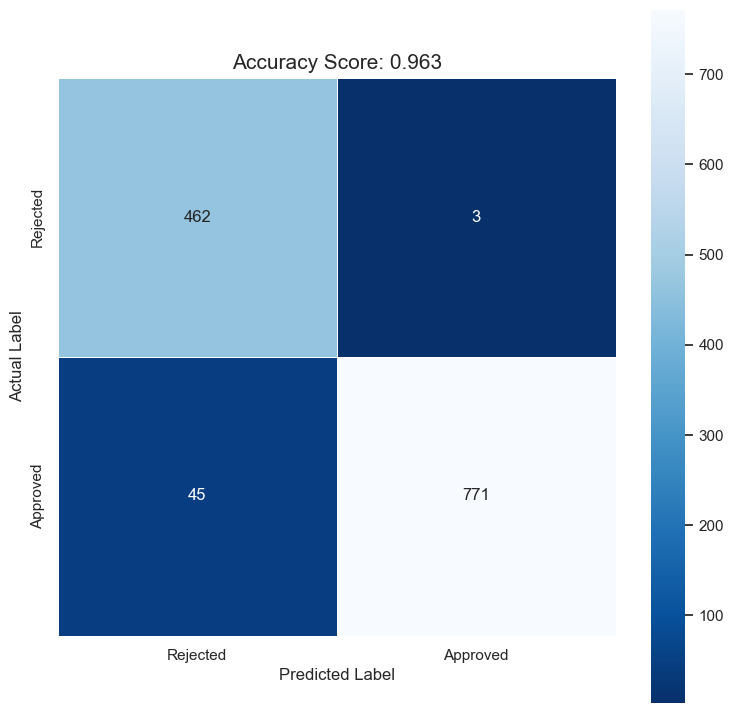

In [42]:
# Evaluate the model: confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Set the target columns 
target = ['Rejected','Approved']

# visualize the confusion matrix
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r",xticklabels = target, yticklabels = target) 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test,y_pred),3))
plt.title(all_sample_title, size = 15)

#### Visualize the decision tree

In [43]:
# visualize the decision tree
from sklearn import tree
print(tree.export_text(clf_entropy))

|--- feature_3 <= 549.50
|   |--- feature_2 <= 5.00
|   |   |--- feature_1 <= 26150000.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  26150000.00
|   |   |   |--- class: 1
|   |--- feature_2 >  5.00
|   |   |--- class: 0
|--- feature_3 >  549.50
|   |--- feature_0 <= 3250000.00
|   |   |--- feature_1 <= 12100000.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  12100000.00
|   |   |   |--- class: 1
|   |--- feature_0 >  3250000.00
|   |   |--- feature_1 <= 31050000.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  31050000.00
|   |   |   |--- class: 1



In [44]:
# feature column

feature = ['income_annum','loan_amount','loan_term','credit_score']
feature

['income_annum', 'loan_amount', 'loan_term', 'credit_score']

In [45]:
# the target column

target = ['rejected','approved']
target

['rejected', 'approved']

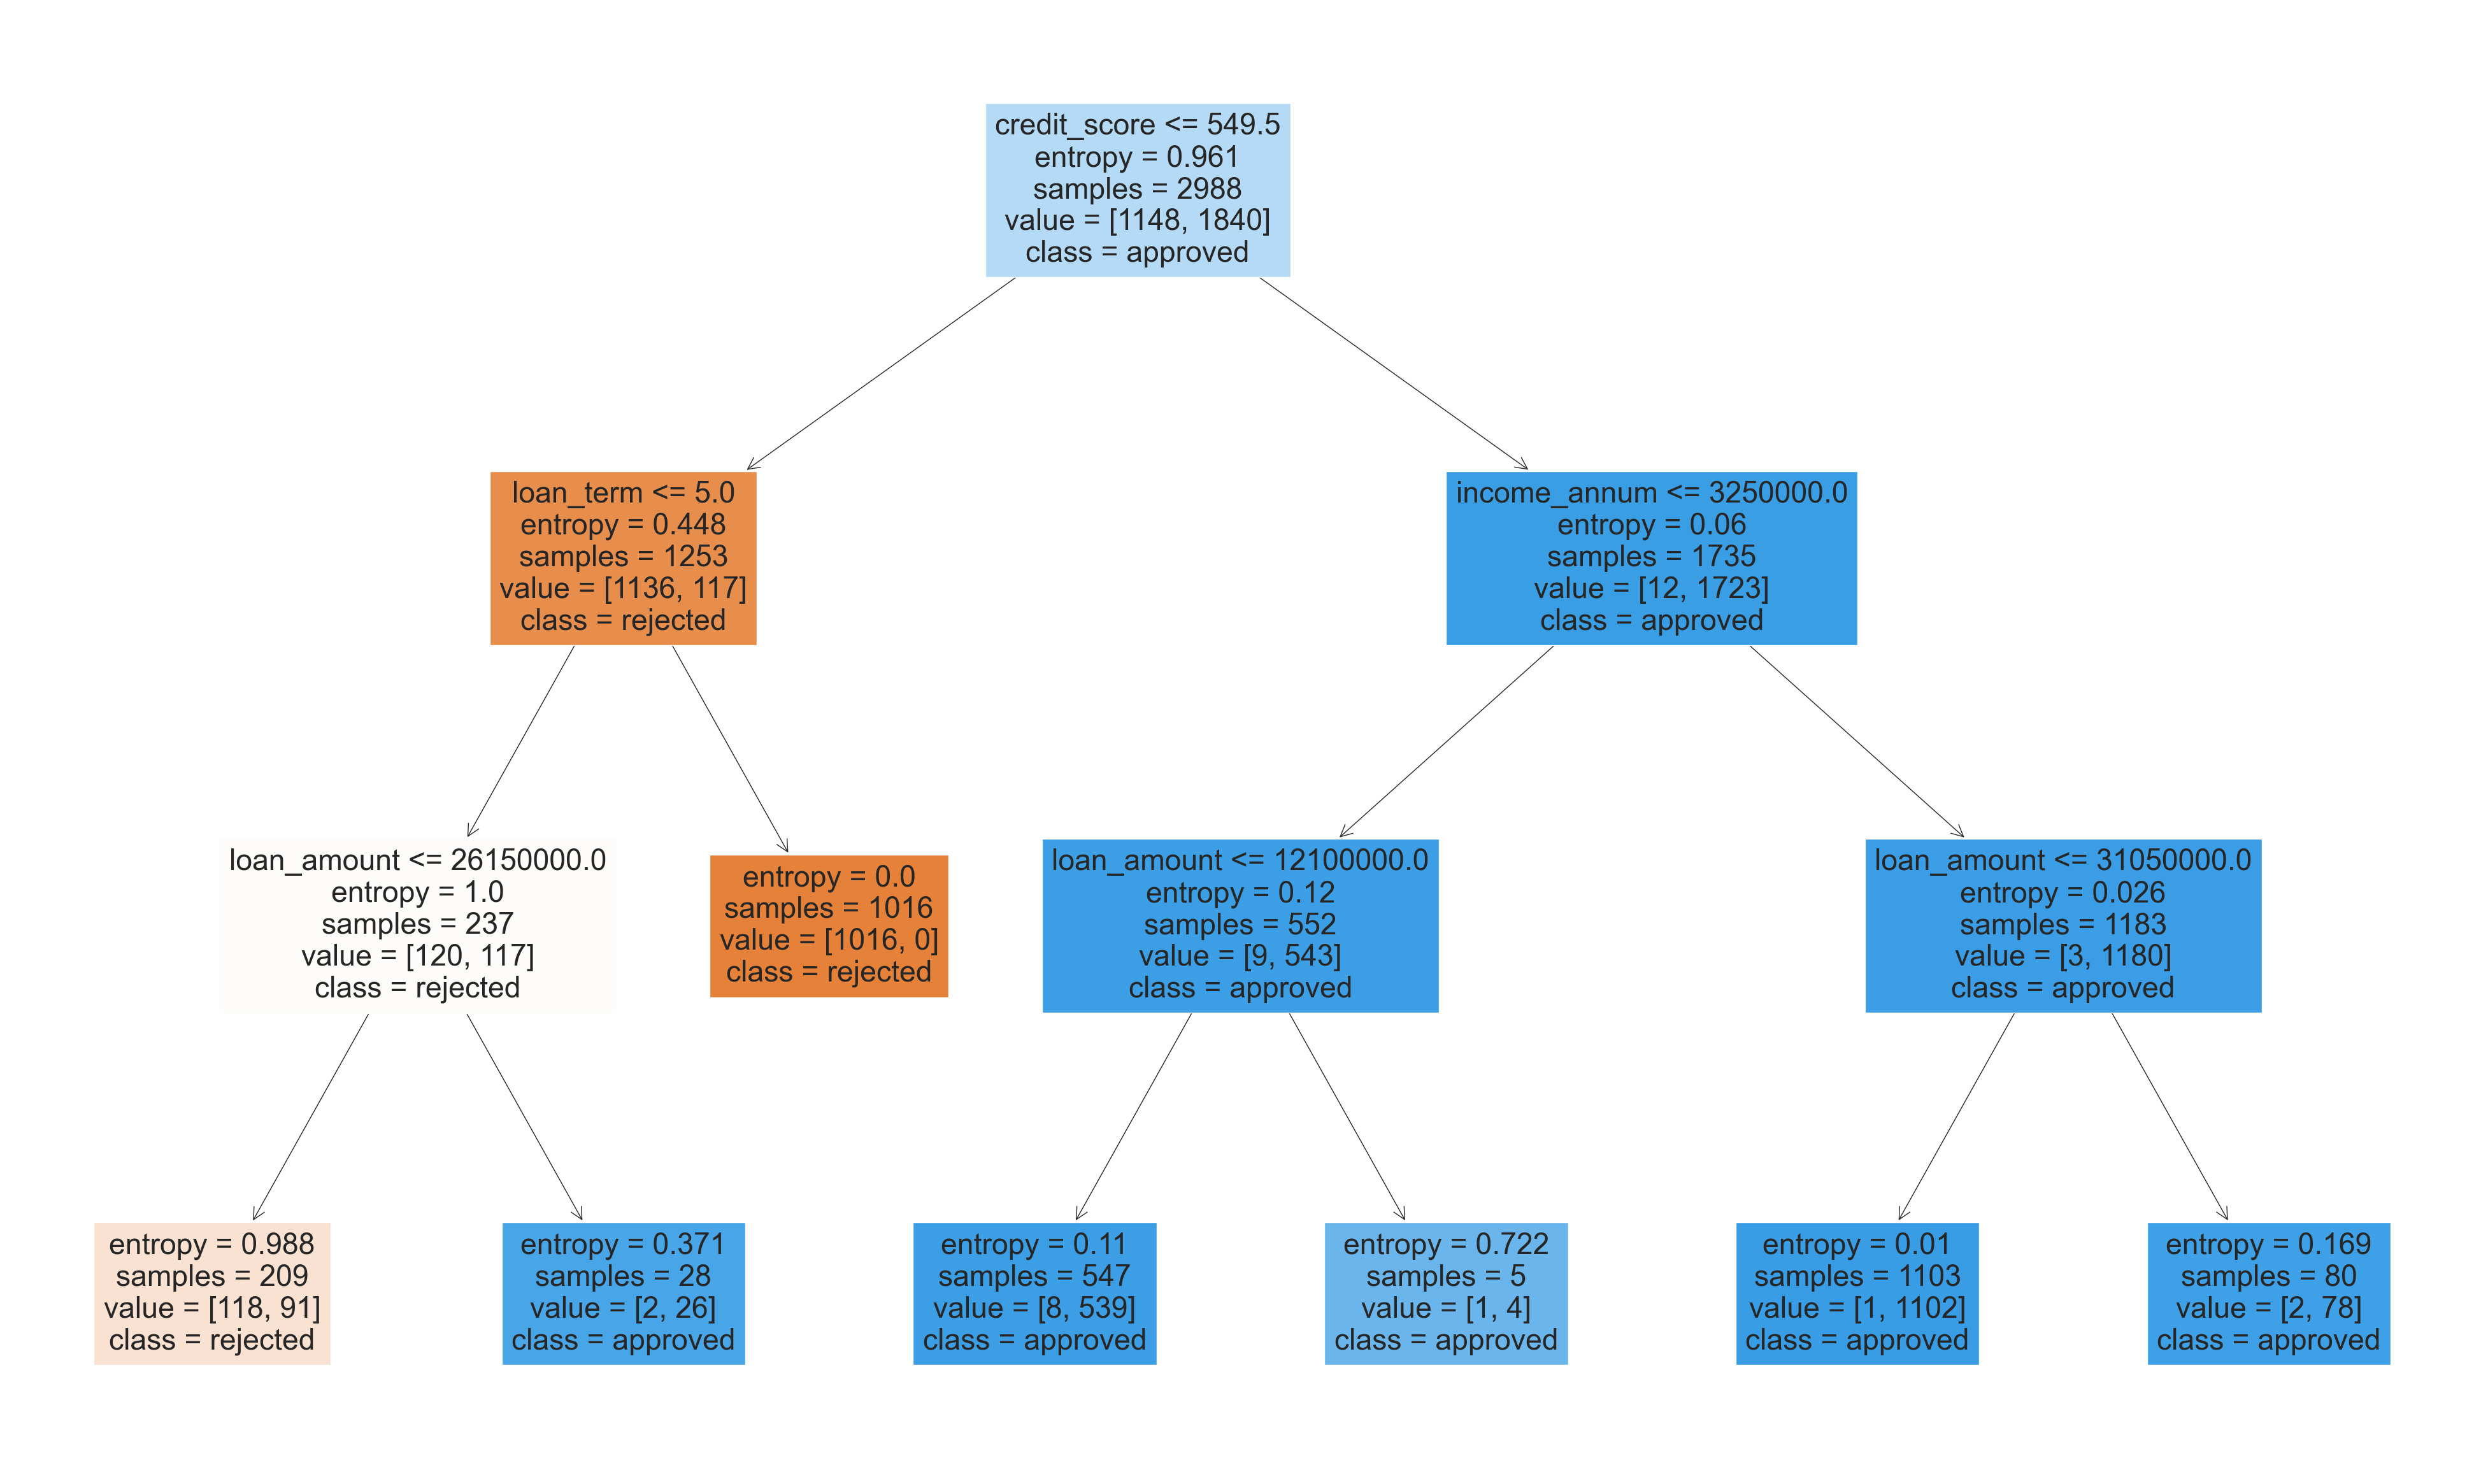

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize = (50,30)) 
_  =tree.plot_tree(clf_entropy, feature_names = feature, class_names = target, filled = True)

#### Predicting applicant X loan status

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
education,4269.0,5.022253e-01,5.000536e-01,0.0,0.0,1.0,1.0,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,1.0,1.0,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
credit_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0


In [50]:
# applicant X X data is as below
# this is the mean value of all dataset

x1 = [[5000000, 1500000, 10, 550]]

In [52]:
# predicting applicant X  using decision tree
# based on our prediction applicant X's loan status will be 1 (approved)

predx1 = clf_entropy.predict(x1)
print(predx1)

[1]


C:\Users\Zikri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
